# Jupyter-NoteBook IndPenSim Import and Plot

## IndPenSim Data import 

Download data and unzip contents to current folder. You need to have the dataset in Google Drive. Mounting Drive with Colab.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Addition details can be found at:<a href='http://www.industrialpenicillinsimulation.com/'> www.industrialpenicillinsimulation.com</a>
Data is downloaded from : <a href='https://data.mendeley.com/datasets/pdnjz7zz5x/1'> Mendeley data Website</a>

In [2]:
## Import necessary packages
import os
from urllib.request import urlretrieve 
import zipfile
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests

In [3]:
!cd /content/drive/MyDrive

**The below cell can be run for downloading the data online. Or else NO NEED to run it.**

In [ ]:
## Downloadinhg zip folder containing data from Mndely data website
print('Patience this is downloading over 0.5 GB of data so might take some time depending on internet connection...')
indpensim_data_link = 'https://data.mendeley.com//datasets/pdnjz7zz5x//1//files//ec0dfb55-7e3c-4124-8b0c-ca8ae7c50fe7//100_Batches_IndPenSim.zip'
# download the url contents in binary format
r = requests.get(indpensim_data_link)
 
# open method to open a file on your system and write the contents
with open("100_batches.zip", "wb") as code:
    code.write(r.content)

Patience this is downloading over 0.5 GB of data so might take some time depending on internet connection...


## Unzip IndPenSim Data

In [4]:
!unzip "/content/drive/MyDrive/100_batches.zip" -d "/content/"


Archive:  /content/drive/MyDrive/100_batches.zip
   creating: /content/Mendeley_data/
  inflating: /content/Mendeley_data/100_Batches_IndPenSim_Statistics.csv  
  inflating: /content/Mendeley_data/100_Batches_IndPenSim_V3.csv  


In [5]:
import pandas as pd
data = pd.read_csv('/content/Mendeley_data/100_Batches_IndPenSim_V3.csv') 

## Data Summary

In [ ]:
# Summary of Dataframe for data
data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,2400,...,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,0,0.95749,14.711,1.017800e-25,58479,62574.0,6.4472,298.22,0.000001,0.089514,5.0,NaN,22,NaN,0.480510,0.19595,NaN,NaN,0.034045,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,0,1.00460,14.699,1.000000e-03,58487,62585.0,6.4932,298.17,0.000001,0.101760,5.0,NaN,22,NaN,0.058147,0.20390,NaN,NaN,0.038702,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,0,1.04980,14.686,9.993400e-04,58495,62598.0,6.5425,298.14,0.000001,0.105800,5.0,NaN,22,NaN,-0.041505,0.20575,NaN,NaN,0.040240,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,0,1.09420,14.661,9.987400e-04,58499,62607.0,6.5753,298.11,0.000001,0.108190,5.0,NaN,22,NaN,-0.056737,0.20602,NaN,NaN,0.041149,0,NaN,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,0,1.13700,14.633,9.982100e-04,58501,62613.0,6.5825,298.09,0.000001,0.110300,5.0,1488.0,22,1667.8,-0.049975,0.20589,1.017800e-25,0.52808,0.041951,0,4.083,0,0,1,1,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,0,72.70800,13.385,5.656700e+00,74071,84211.0,6.5085,297.89,215.090000,1.204400,4.0,NaN,23,NaN,0.323420,0.19996,NaN,NaN,0.995500,0,NaN,0,0,1,100,100,1,43854.0,44034.0,43947.0,...,726090.0,728080.0,730120.0,732300.0,734610.0,737070.0,739570.0,741980.0,744240.0,746400.0,748530.0,750690.0,752960.0,755370.0,757980.0,760780.0,763650.0,766580.0,769520.0,772460

In [ ]:
data.shape

(113935, 2239)

The dataset contains 113935 rows (readings) and 2239 columns (variables). 

Our objective is to find a way to estimate the value in the "Penicillin concentration(P:g/L)" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new cases too, simply by giving information for manually controllable variables

Let's check the data type for each column.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


All the columns in the dataset are numerical (float64 or int64) in nature. None of the columns contain any missing values, which saves us a fair bit of work!

Since our work is for batches 31-60 i.e., Controlled by operators. Creating a new data frame containing only batches 31-60.

In [6]:
data_controlled=data.drop(data[data['0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)']==0].index,inplace=False)

In [ ]:
data_controlled

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,2400,...,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203,202,201
34325,0.2,30,100,8,0.00000,59.3350,0.0001,232.40000,0,0.6,0,0.99198,14.720,0.001000,57316,61711.0,6.4018,297.66,216.04,0.081565,5.0,NaN,22,NaN,0.489910,0.19579,NaN,NaN,0.031021,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34326,0.4,30,100,8,0.00000,98.6030,0.0001,68.50300,0,0.6,0,1.04640,14.700,0.000999,57333,61733.0,6.4700,297.87,273.27,0.091634,5.0,NaN,22,NaN,0.043518,0.20419,NaN,NaN,0.034851,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34327,0.6,30,100,8,0.00000,110.9100,0.0001,0.00010,0,0.6,0,1.09970,14.687,0.000998,57353,61757.0,6.5381,297.85,265.92,0.094945,5.0,NaN,22,NaN,-0.058396,0.20608,NaN,NaN,0.036111,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34328,0.8,30,100,8,0.00000,96.1750,0.0001,93.29100,0,0.6,0,1.15220,14.671,0.000998,57369,61778.0,6.6022,298.15,346.64,0.096930,5.0,NaN,22,NaN,-0.076628,0.20642,NaN,NaN,0.036866,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34329,1.0,30,100,8,0.51495,48.0870,100.0100,9.32910,0,0.6,0,1.20390,14.637,0.000997,57377,61790.0,6.6441,298.04,316.23,0.098693,5.0,1402.5,22,1679.2,-0.067184,0.20624,0.001,0.45789,0.037537,0,4.0792,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68705,229.2,65,100,45,0.00000,4.0833,28.7190,0.76779,250,0.9,0,21.65000,12.439,18.913000,73612,82374.0,6.5029,297.89,172.29,1.396900,9.0,NaN,23,NaN,0.644530,0.19681,NaN,NaN,1.155200,0,NaN,0,1,1,60,60,0,109890.0,109850.0,110320.0,...,1553900.0,1556700.0,1559500.0,1562500.0,1565700.0,1569100.0,1572500.0,1575800.0,1579000.0,1582200.0,1585300.0,1588400.0,1591700.0,1595100.0,1598800.0,1602500.0,1606400.0,1610300.0

In [ ]:
data_controlled.shape

(34385, 2239)

The dataset contains 34,385 rows (readings) and 2,239 columns (variables).
Here are some statistics for the numerical columns:

In [ ]:
data_controlled.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,2400,...,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203,202,201
count,34385.000000,34385.000000,34385.0,34385.000000,34385.00000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,3.438500e+04,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,622.000000,34385.000000,622.000000,34385.000000,34385.000000,6.220000e+02,622.000000,34385.000000,34385.0,622.000000,34385.0,34385.0,34385.0,34385.000000,34385.000000,34385.0,34385.000000,34385.000000,34385.000000,...,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,3.438500e+04,0.0,0.0
mean,115.166526,65.378072,100.0,78.165334,0.09622,58.957324,76.854041,21.370467,155.569289,0.944758,-215.791770,4.381573,12.585432,1.413284e+01,73539.830362,81253.472415,6.501528,298.023826,273.228873,1.448812,8.470292,2159.206736,26.332849,2045.963987,1.253030,0.191580,1.413585e+01,18.894796,1.261317,0.0,51.611089,0.0,1.0,1.0,45.367602,45.367602,0.0,88324.111153,88418.429053,88677.144074,...,1.295157e+06,1.297628e+06,1.300145e+06,1.302789e+06,1.305593e+06,1.308525e+06,1.311503e+06,1.314432e+06,1.317253e+06,1.319970e+06,1.322645e+06,1.325367e+06,1.328219e+06,1.331248e+06,1.334457e+06,1.337818e+06,1.341287e+06,1.344816e+06,1.348358e+06,1.351859e+06,1.355265e+06,1.358531e+06,1.361653e+06,1.364698e+06,1.367831e+06,1.371305e+06,1.375419e+06,1.380440e+06,1.386510e+06,1.393558e+06,1.401250e+06,1.409006e+06,1.416103e+06,1.421833e+06,1.425704e+06,1.427594e+06,1.427809e+06,1.427007e+06,NaN,NaN
std,66.936651,11.506006,0.0,28.567873,0.63233,43.443597,105.508101,50.290676,155.223394,0.133915,903.672917,12.309183,1.632831,9.571818e+00,8553.567559,10065.693728,0.039866,0.158556,128.323276,0.472095,3.807940,1787.907085,4.946949,625.550330,0.466494,0.004328,9.813168e+00,7.045290,0.488254,0.0,23.936759,0.0,0.0,0.0,8.645706,8.645706,0.0,46000.864408,46084.961099,46170.966013,...,6.127526e+05,6.133733e+05,6.139956e+05,6.146208e+05,6.152494e+05,6.158812e+05,6.165144e+05,6.171473e+05,6.177786e+05,6.184083e+05,6.190379e+05,6.196689e+05,6.203029e+05,6.209410e+05,6.215829e+05,6.222287e+05,6.228768e+05,6.235272e+05,6.241780e+05,6.248288e+05,6.254783e+05,6.261256e+05,6.267713e+05,6.274157e+05,6.280623e+05,6.287165e+05,6.29383

Columns `PAA concentration offline(PAA_offline:PAA (g L^{-1})`, `NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))`, `Offline Penicillin concentration(P_offline:P(g L^{-1}))`, and `Offline Biomass concentratio(X_offline:X(g L^{-1}))` have missing values 



In [ ]:
data_controlled['2-PAT control(PAT_ref:PAT ref)'].unique()

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [7]:
b31=data_controlled.loc[data_controlled['2-PAT control(PAT_ref:PAT ref)']==31]

In [ ]:
b31

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),Dumped broth flow(Fremoved:L/h),Substrate concentration(S:g/L),Dissolved oxygen concentration(DO2:mg/L),Penicillin concentration(P:g/L),Vessel Volume(V:L),Vessel Weight(Wt:Kg),pH(pH:pH),Temperature(T:K),Generated heat(Q:kJ),carbon dioxide percent in off-gas(CO2outgas:%),PAA flow(Fpaa:PAA flow (L/h)),PAA concentration offline(PAA_offline:PAA (g L^{-1})),Oil flow(Foil:L/hr),NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag,2400,...,240,239,238,237,236,235,234,233,232,231,230,229,228,227,226,225,224,223,222,221,220,219,218,217,216,215,214,213,212,211,210,209,208,207,206,205,204,203,202,201
34325,0.2,30,100,8,0.00000,59.335,0.0001,232.4000,0,0.6,0,0.991980,14.720,0.001000,57316,61711.0,6.4018,297.66,216.04,0.081565,5.0,NaN,22,NaN,0.489910,0.19579,NaN,NaN,0.031021,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34326,0.4,30,100,8,0.00000,98.603,0.0001,68.5030,0,0.6,0,1.046400,14.700,0.000999,57333,61733.0,6.4700,297.87,273.27,0.091634,5.0,NaN,22,NaN,0.043518,0.20419,NaN,NaN,0.034851,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34327,0.6,30,100,8,0.00000,110.910,0.0001,0.0001,0,0.6,0,1.099700,14.687,0.000998,57353,61757.0,6.5381,297.85,265.92,0.094945,5.0,NaN,22,NaN,-0.058396,0.20608,NaN,NaN,0.036111,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34328,0.8,30,100,8,0.00000,96.175,0.0001,93.2910,0,0.6,0,1.152200,14.671,0.000998,57369,61778.0,6.6022,298.15,346.64,0.096930,5.0,NaN,22,NaN,-0.076628,0.20642,NaN,NaN,0.036866,0,NaN,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
34329,1.0,30,100,8,0.51495,48.087,100.0100,9.3291,0,0.6,0,1.203900,14.637,0.000997,57377,61790.0,6.6441,298.04,316.23,0.098693,5.0,1402.5,22,1679.2,-0.067184,0.20624,0.001,0.45789,0.037537,0,4.0792,0,1,1,31,31,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35570,249.2,65,100,105,0.00000,88.634,64.8040,10.7020,250,0.9,0,0.001786,12.907,33.581000,84431,94288.0,6.4930,298.00,296.02,1.621000,12.0,NaN,23,NaN,1.179700,0.19174,NaN,NaN,1.341500,0,NaN,0,1,1,31,31,0,181740.0,181670.0,182230.0,...,2526400.0,2530000.0,2533700.0,2537600.0,2541600.0,2545800.0,2550000.0,2554200.0,2558200.0,2562100.0,2566000.0,2569900.0,2574000.0,2578200.0,2582600.0,2587200.0,2591900.0,2596600.0,26

It seems that it shows the data for batch 1. Let's see how Penicillin concentration changes with time

## Batch 31

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

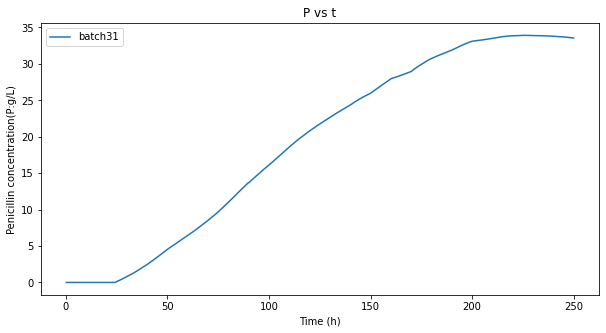

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(b31['Time (h)'],b31['Penicillin concentration(P:g/L)'])
plt.title('P vs t')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin concentration(P:g/L)')
plt.legend(['batch31'],loc=2,fontsize=10)

#save the figure
plt.savefig('Pvst.png', dpi=300, bbox_inches='tight')


plt.show()

Lets see as a whole how is P dependent on time

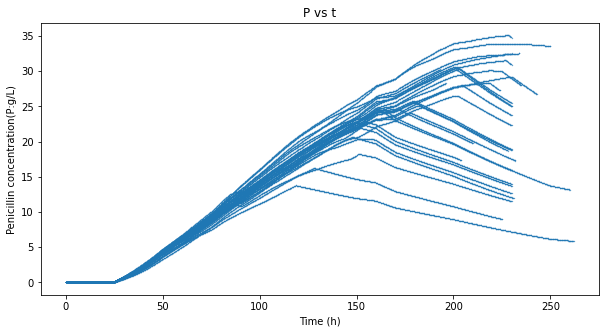

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data_controlled['Time (h)'],data_controlled['Penicillin concentration(P:g/L)'],s=.1)
plt.title('P vs t')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin concentration(P:g/L)')

#save the figure
plt.savefig('Pvst_.png', dpi=300, bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'Fh')

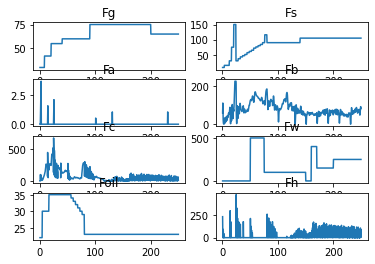

In [ ]:
figure, axis = plt.subplots(4,2)
figure.figsize=(100,10)

axis[0, 0].plot(b31['Time (h)'],b31['Aeration rate(Fg:L/h)'])
axis[0, 0].set_title("Fg")

axis[0, 1].plot(b31['Time (h)'],b31['Sugar feed rate(Fs:L/h)'])
axis[0, 1].set_title("Fs")

axis[1, 0].plot(b31['Time (h)'],b31['Acid flow rate(Fa:L/h)'])
axis[1, 0].set_title("Fa")

axis[1, 1].plot(b31['Time (h)'],b31['Base flow rate(Fb:L/h)'])
axis[1, 1].set_title("Fb")

axis[2, 0].plot(b31['Time (h)'],b31['Heating/cooling water flow rate(Fc:L/h)'])
axis[2, 0].set_title("Fc")

axis[2, 1].plot(b31['Time (h)'],b31['Water for injection/dilution(Fw:L/h)'])
axis[2, 1].set_title("Fw")

axis[3, 0].plot(b31['Time (h)'],b31['Oil flow(Foil:L/hr)'])
axis[3, 0].set_title("Foil")

axis[3, 1].plot(b31['Time (h)'],b31['Heating water flow rate(Fh:L/h)'])
axis[3, 1].set_title("Fh")

Text(0, 0.5, 'Fg')

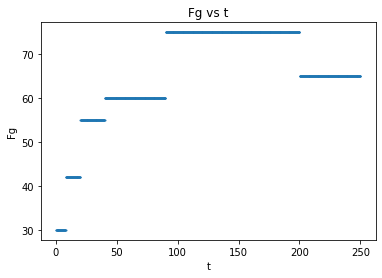

In [ ]:
plt.scatter(b31['Time (h)'],b31['Aeration rate(Fg:L/h)'],s=1)
plt.title('Fg vs t')
plt.xlabel('t')
plt.ylabel('Fg')

Text(0, 0.5, 'P')

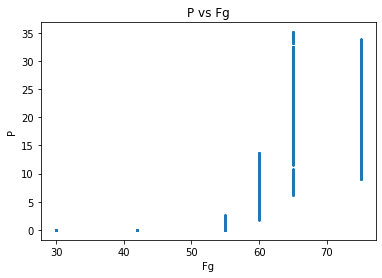

In [ ]:
plt.scatter(df_['Aeration rate(Fg:L/h)'],df_['Penicillin concentration(P:g/L)'],s=1)
plt.title('P vs Fg')
plt.xlabel('Fg')
plt.ylabel('P')

Text(0, 0.5, 'P')

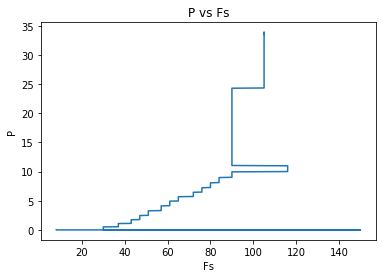

In [ ]:
plt.plot(b31['Sugar feed rate(Fs:L/h)'],b31['Penicillin concentration(P:g/L)'])
plt.title('P vs Fs')
plt.xlabel('Fs')
plt.ylabel('P')

In [ ]:
plt.plot(b31['Sugar feed rate(Fs:L/h)'],b31['Penicillin concentration(P:g/L)'])
plt.title('P vs Fs')
plt.xlabel('Fs')
plt.ylabel('P')

Fg and Fs ... multiple P values for same x value in above graphs

## Batch 32

In [ ]:
b32=data_controlled.loc[data_controlled['2-PAT control(PAT_ref:PAT ref)']==32]

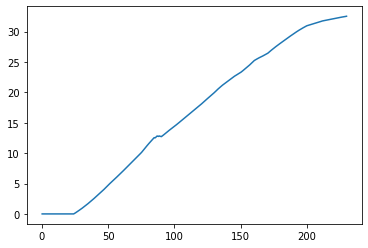

In [ ]:
plt.plot(b32['Time (h)'],b32['Penicillin concentration(P:g/L)'])

It is similar to batch 31

##Manipulated Variables

In [9]:
data_controlled.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)',
       ...
       '210', '209', '208', '207', '206', '205', '204', '203', '202', '201'],
      dtype='object', length=2239)

In [10]:
selected_columns=['Time (h)', 'Aeration rate(Fg:L/h)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)','Oil flow(Foil:L/hr)','Penicillin concentration(P:g/L)']

In [ ]:
b31[selected_columns]

,Time (h),Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Oil flow(Foil:L/hr),Penicillin concentration(P:g/L)
34325,0.2,30,8,0.00000,59.335,0.0001,232.4000,0,22,0.001000
34326,0.4,30,8,0.00000,98.603,0.0001,68.5030,0,22,0.000999
34327,0.6,30,8,0.00000,110.910,0.0001,0.0001,0,22,0.000998
34328,0.8,30,8,0.00000,96.175,0.0001,93.2910,0,22,0.000998
34329,1.0,30,8,0.51495,48.087,100.0100,9.3291,0,22,0.000997
...,...,...,...,...,...,...,...,...,...,...
35570,249.2,65,105,0.00000,88.634,64.8040,10.7020,250,23,33.581000
35571,249.4,65,105,0.00000,91.945,38.1330,1.0702,250,23,33.574000
35572,249.6,65,105,0.00000,91.002,11.4400,62.5640,250,23,33.566000
35573,249.8,65,105,0.00000,87.260,29.8290,6.2564,250,23,33.558000


In [11]:
df=data_controlled[selected_columns]
corrMatrix = df.corr()
corrMatrix

,Time (h),Aeration rate(Fg:L/h),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Oil flow(Foil:L/hr),Penicillin concentration(P:g/L)
Time (h),1.000000,0.683308,0.450534,0.133121,-0.378383,-0.448851,0.298818,0.238772,-0.740496,0.865733
Aeration rate(Fg:L/h),0.683308,1.000000,0.563075,0.032189,-0.061037,-0.432307,0.090944,0.148919,-0.605545,0.745711
Sugar feed rate(Fs:L/h),0.450534,0.563075,1.000000,-0.016312,0.287122,-0.150310,0.021779,0.186706,-0.352809,0.495463
Acid flow rate(Fa:L/h),0.133121,0.032189,-0.016312,1.000000,-0.194593,-0.015877,0.087529,-0.004191,-0.084751,0.045345
Base flow rate(Fb:L/h),-0.378383,-0.061037,0.287122,-0.194593,1.000000,0.261071,-0.170389,0.068614,0.348190,-0.200881
Heating/cooling water flow rate(Fc:L/h),-0.448851,-0.432307,-0.150310,-0.015877,0.261071,1.000000,-0.162889,-0.280346,0.554091,-0.527495
Heating water flow rate(Fh:L/h),0.298818,0.090944,0.021779,0.087529,-0.170389,-0.162889,1.000000,0.077797,-0.167627,0.173499
Water for injection/dilution(Fw:L/h),0.238772,0.148919,0.186706,-0.004191,0.068614,-0.280346,0.077797,1.000000,0.038320,0.177306
Oil flow(Foil:L/hr),-0.740496,-0.605545,-0.352809,-0.084751,0.348190,0.554091,-0.167627,0.038320,1.000000,-0.766047
Penicillin concentration(P:g/L),0.865733,0.745711,0.495463,0.045345,-0.200881,-0.527495,0.173499,0.177306,-0.766047,1.000000


# Linear Regression

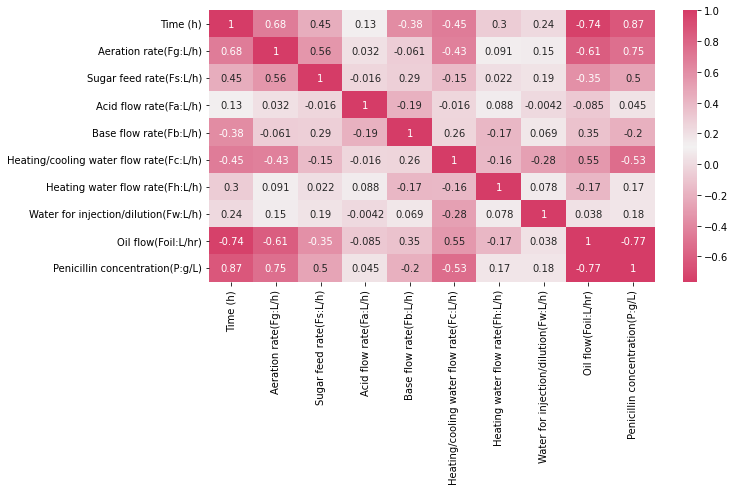

In [ ]:

plt.figure(figsize=(10,5))
cmap = sns.diverging_palette(1,1, as_cmap=True)
sns.heatmap(corrMatrix, cmap=cmap, annot=True)

#save the figure
plt.savefig('corr.png', dpi=300, bbox_inches='tight')

plt.show()


In [12]:
var=['Time (h)','Aeration rate(Fg:L/h)','Oil flow(Foil:L/hr)','Heating/cooling water flow rate(Fc:L/h)','Sugar feed rate(Fs:L/h)','Penicillin concentration(P:g/L)']

In [ ]:
len(var)

6

In [13]:
df_=data_controlled[var]
df_

,Time (h),Aeration rate(Fg:L/h),Oil flow(Foil:L/hr),Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),Penicillin concentration(P:g/L)
34325,0.2,30,22,0.0001,8,0.001000
34326,0.4,30,22,0.0001,8,0.000999
34327,0.6,30,22,0.0001,8,0.000998
34328,0.8,30,22,0.0001,8,0.000998
34329,1.0,30,22,100.0100,8,0.000997
...,...,...,...,...,...,...
68705,229.2,65,23,28.7190,45,18.913000
68706,229.4,65,23,8.6156,45,18.889000
68707,229.6,65,23,28.2300,45,18.866000
68708,229.8,65,23,8.4690,45,18.842000


In [14]:
df_.describe()

,Time (h),Aeration rate(Fg:L/h),Oil flow(Foil:L/hr),Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),Penicillin concentration(P:g/L)
count,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,3.438500e+04
mean,115.166526,65.378072,26.332849,76.854041,78.165334,1.413284e+01
std,66.936651,11.506006,4.946949,105.508101,28.567873,9.571818e+00
min,0.200000,30.000000,22.000000,0.000100,8.000000,1.815400e-25
25%,57.400000,60.000000,23.000000,10.929000,60.000000,5.697600e+00
50%,114.800000,65.000000,23.000000,35.281000,90.000000,1.457700e+01
75%,172.000000,75.000000,30.000000,98.512000,90.000000,2.181300e+01
max,262.000000,75.000000,35.000000,986.970000,150.000000,3.508800e+01


Generally split is done as shown in the just next cell

But in our case we can have few batches to train and few to test

Sometimes it is divided into three parts: train, test and validation ... we can do that also 

In [15]:
from sklearn.model_selection import train_test_split
X=df_[['Time (h)','Aeration rate(Fg:L/h)','Oil flow(Foil:L/hr)','Heating/cooling water flow rate(Fc:L/h)','Sugar feed rate(Fs:L/h)']]
y=df_['Penicillin concentration(P:g/L)']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_std,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_std, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_std, y_test)))
print('Loss: {:.3f}'
     .format(mean_squared_error(y_test, linreg.predict(X_test_std))))

linear model coeff (w): [ 4.99618144  1.87985783 -1.75686374 -0.9052429   0.67083153]
linear model intercept (b): 14.100
R-squared score (training): 0.824
R-squared score (test): 0.821
Loss: 16.345


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(linreg,X,y)

array([0.83862334, 0.89758322, 0.44256683, 0.83111822, 0.87426698])

In [20]:
X_std=sc.transform(X)
cross_val_score(linreg,X_std,y)


array([0.83862334, 0.89758322, 0.44256683, 0.83111822, 0.87426698])

One of the element is 0.4 which is very low 

In [21]:
type(X_test['Time (h)'])

pandas.core.series.Series

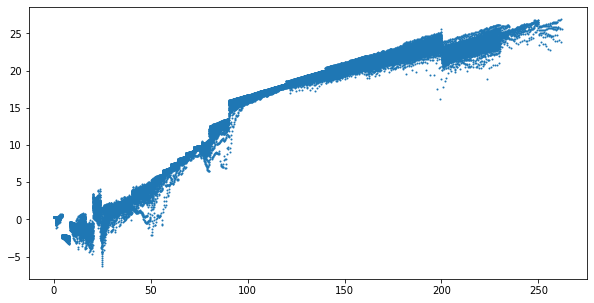

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X['Time (h)'],linreg.predict(X_std),s=1)
plt.show()

It can be seen that predicted values almost match the disctribution curve

# Ridge or Lasso

Taking all manipulatable variables 

In [23]:
inputs=['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
      'Water for injection/dilution(Fw:L/h)','Oil flow(Foil:L/hr)']
X_=data_controlled[inputs]
y_=data_controlled['Penicillin concentration(P:g/L)']
X__train, X__test, y__train, y__test=train_test_split(X_,y_,test_size=0.4, random_state=42)
X__train_std = sc.fit_transform(X__train)
X__test_std = sc.transform(X__test)


In [24]:
from sklearn.linear_model import Lasso
linlas=Lasso(alpha=.25)
linlas.fit(X__train_std,y__train)

Lasso(alpha=0.25)

In [25]:
linlas.coef_

array([ 5.48829621,  1.69130757,  0.        ,  0.09597252, -0.06722468,
        0.79519855, -0.81990865, -0.24264025, -0.        , -1.81774279])

In [26]:
linlas.score(X__train_std,y__train)

0.8321046170924785

In [27]:
linlas.score(X__test_std,y__test)

0.8357100460828196

In [28]:
mean_squared_error(y__test, linlas.predict(X__test_std))

15.052839373961342

In [29]:
cross_val_score(linlas,X_,y_)

array([0.84690517, 0.87572042, 0.49560587, 0.8512768 , 0.87960954])

# Polynomial

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
p_train, p_test, q_train, q_test = train_test_split(X_poly, y,test_size=0.2,random_state = 42)
p_train_std = sc.fit_transform(p_train)
p_test_std = sc.transform(p_test)

linreg_poly = LinearRegression().fit(p_train_std, q_train)

In [31]:
linreg_poly.coef_

array([  0.        ,  17.636206  ,   9.28462458, -11.85089061,
         2.77295378, -14.33266514, -18.39751891,   7.24291369,
         2.4905007 ,  -2.43126721,   3.08330484,  -7.35014756,
        -6.62827494,   2.90575529,   6.69199192,  17.15930655,
        -3.86780969,   4.98153137,  -0.04861531,  -0.5417832 ,
         2.81972672])

In [32]:
linreg_poly.intercept_

14.100181293991344

In [33]:
linreg_poly.score(p_train_std, q_train)

0.8670396873640567

In [34]:
linreg_poly.score(p_test_std, q_test)

0.870111196207849

In [35]:
mean_squared_error(q_test, linreg_poly.predict(p_test_std))

11.888046245241283

In [36]:
cross_val_score(linreg_poly,X,y)

array([0.83862334, 0.89758322, 0.44256683, 0.83111822, 0.87426698])

# SVR

In [43]:
from sklearn.svm import SVR
svr=SVR(C=0.5, epsilon=0.2)
svr.fit(X_train_std,y_train)

SVR(C=0.5, epsilon=0.2)

In [44]:
svr.score(X_train_std, y_train)

0.8671188799497368

In [45]:
svr.score(X_test_std,y_test)

0.8723778164591238

In [41]:
mean_squared_error(y_test, svr.predict(X_test_std))

11.587774464825948

In [42]:
cross_val_score(svr,X,y)

array([0.8991941 , 0.92289322, 0.52822104, 0.84496176, 0.88074397])

# Gradient Boost



In [46]:
from sklearn.ensemble import GradientBoostingRegressor

Though tree models are not affected by standardization, using scaled trining and test sets as they are available.



In [56]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_std, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [57]:
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

Model Accuracy: 0.886


In [58]:
print("Model Accuracy: %.3f" % gbr.score(X_train_std, y_train))

Model Accuracy: 0.886


In [59]:
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 10.4452


In [60]:
cross_val_score(gbr,X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

array([0.86268638, 0.91509097, 0.57796864, 0.84389067, 0.85142267])